Found 1153 images belonging to 11 classes.
Found 287 images belonging to 11 classes.
Found 1440 images belonging to 11 classes.
Epoch 1/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 219s 6s/step - accuracy: 0.1899 - loss: 1.9669 - val_accuracy: 0.3519 - val_loss: 1.3875
Epoch 2/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 194s 4s/step - accuracy: 0.3425 - loss: 1.3727 - val_accuracy: 0.5366 - val_loss: 1.3200
Epoch 3/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 146s 4s/step - accuracy: 0.4919 - loss: 1.3327 - val_accuracy: 0.3937 - val_loss: 1.2953
Epoch 4/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 142s 4s/step - accuracy: 0.4304 - loss: 1.2863 - val_accuracy: 0.4286 - val_loss: 1.2667
Epoch 5/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 140s 4s/step - accuracy: 0.4891 - loss: 1.2436 - val_accuracy: 0.4739 - val_loss: 1.2687
9/9 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.4627 - loss: 1.2940


Test accuracy: 0.4739


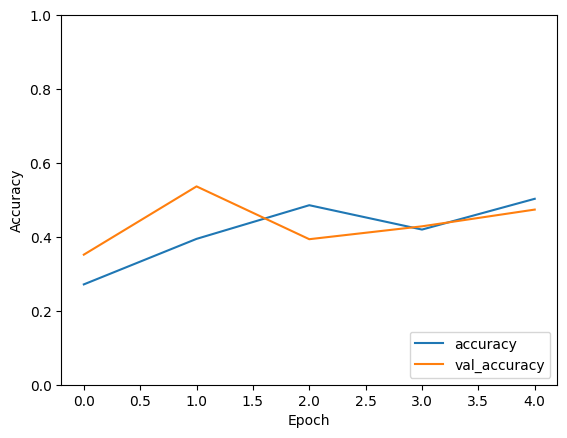

In [6]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


# Define paths and parameters
dataset_base_path = '/content/drive/MyDrive/WeatherDataset-Q3/WeatherDataset'


# Define image size and batch size
IMG_SIZE = (150, 150)
BATCH_SIZE = 32

# Define the base path
dataset_base_path = '/content/drive/MyDrive/WeatherDataset-Q3/WeatherDataset'

# Define directories for training and testing
train_dir = dataset_base_path  # The base directory that contains all weather condition folders
test_dir = dataset_base_path

# Create image data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Use 20% of training data for validation
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Create train and validation generators
train_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',  # Multi-class classification
    subset='training',  # Specify subset for training data
)

validation_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',  # Multi-class classification
    subset='validation',  # Specify subset for validation data
)

# Create test generator
test_generator = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'  # Multi-class classification
)

# Load the ResNet50 model pre-trained on ImageNet
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))

# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(train_generator.class_indices), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(validation_generator)
print(f"Test accuracy: {test_accuracy:.4f}")

# Save the model
model.save('/content/drive/MyDrive/WeatherDataset-Q3/ResNet50_Weather_Model.h5')

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()
